In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [5]:
import plotly as py
from statistics import mean
import plotly.graph_objects as go
import plotly.express as px 
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
# from umap import UMAP

#Models
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold ,KFold
from sklearn.ensemble import VotingClassifier


import optuna
# from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [7]:
train_df = pd.read_csv("/home/hamid/Projects/Tabular_playground_sep2021/train.csv")
train_df.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f110,f111,f112,f113,f114,f115,f116,f117,f118,claim
0,0,0.10859,0.004314,-37.566,0.017364,0.28915,-10.25100,135.12,168900.0,3.992400e+14,...,-12.2280,1.7482,1.90960,-7.11570,4378.80,1.2096,8.613400e+14,140.1,1.01770,1
1,1,0.10090,0.299610,11822.000,0.276500,0.45970,-0.83733,1721.90,119810.0,3.874100e+15,...,-56.7580,4.1684,0.34808,4.14200,913.23,1.2464,7.575100e+15,1861.0,0.28359,0
2,2,0.17803,-0.006980,907.270,0.272140,0.45948,0.17327,2298.00,360650.0,1.224500e+13,...,-5.7688,1.2042,0.26290,8.13120,45119.00,1.1764,3.218100e+14,3838.2,0.40690,1
3,3,0.15236,0.007259,780.100,0.025179,0.51947,7.49140,112.51,259490.0,7.781400e+13,...,-34.8580,2.0694,0.79631,-16.33600,4952.40,1.1784,4.533000e+12,4889.1,0.51486,1
4,4,0.11623,0.502900,-109.150,0.297910,0.34490,-0.40932,2538.90,65332.0,1.907200e+15,...,-13.6410,1.5298,1.14640,-0.43124,3856.50,1.4830,-8.991300e+12,NaN,0.23049,1


In [8]:
test_df = pd.read_csv("/home/hamid/Projects/Tabular_playground_sep2021/test.csv")
test_df.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118
0,957919,0.165850,0.487050,1295.00,0.02310,0.31900,0.90188,573.29,3743.7,2.705700e+12,...,0.16253,-22.1890,2.0655,0.430880,-10.7410,81606.0,1.1940,1.980400e+14,2017.1,0.46357
1,957920,0.129650,0.373480,1763.00,0.72884,0.33247,-1.26310,875.55,554370.0,5.955700e+14,...,0.81528,-1.6342,1.5736,-1.071200,11.8320,90114.0,1.1507,4.388000e+16,6638.9,0.28125
2,957921,0.120190,0.445210,736.26,0.04615,0.29605,0.31665,2659.50,317140.0,3.977800e+14,...,0.81831,-32.7800,2.1364,-1.931200,-3.2804,37739.0,1.1548,1.718100e+14,5844.0,0.13797
3,957922,0.054008,0.395960,996.14,0.85934,0.36678,-0.17060,386.56,325680.0,-3.432200e+13,...,0.86559,-2.4162,1.5199,-0.011633,1.3840,26849.0,1.1490,2.138800e+17,6173.3,0.32910
4,957923,0.079947,-0.006919,10574.00,0.34845,0.45008,-1.84200,3027.00,428150.0,9.291500e+11,...,0.25190,-18.6300,3.7387,0.757080,-4.9405,50336.0,1.2488,2.151300e+17,2250.1,0.33796


In [9]:
features = train_df.drop(["id","claim"],axis=1).columns.tolist()
print(features, end ="")

['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78', 'f79', 'f80', 'f81', 'f82', 'f83', 'f84', 'f85', 'f86', 'f87', 'f88', 'f89', 'f90', 'f91', 'f92', 'f93', 'f94', 'f95', 'f96', 'f97', 'f98', 'f99', 'f100', 'f101', 'f102', 'f103', 'f104', 'f105', 'f106', 'f107', 'f108', 'f109', 'f110', 'f111', 'f112', 'f113', 'f114', 'f115', 'f116', 'f117', 'f118']

In [10]:
 def missing_rate(data):
    missing_rate = {}
    for col in data.columns:
        column_missing_rate = data[col].isna().sum() / len(data[col]) * 100
        missing_rate[col] = round(column_missing_rate,2)

    missing_rate = pd.DataFrame(missing_rate.items(),index=None)
    return missing_rate


In [11]:
missing_rate_train = missing_rate(train_df[features])
missing_rate_train
missing_rate_test = missing_rate(test_df[features])
missing_rate_test
total_missing = pd.concat([missing_rate_train,missing_rate_test],axis=1)
total_missing

,0,1,0,1
0,f1,1.59,f1,1.58
1,f2,1.59,f2,1.60
2,f3,1.62,f3,1.58
3,f4,1.62,f4,1.57
4,f5,1.61,f5,1.60
...,...,...,...,...
113,f114,1.61,f114,1.61
114,f115,1.62,f115,1.62
115,f116,1.63,f116,1.64
116,f117,1.61,f117,1.57


# EDA

<AxesSubplot:xlabel='claim', ylabel='Count'>

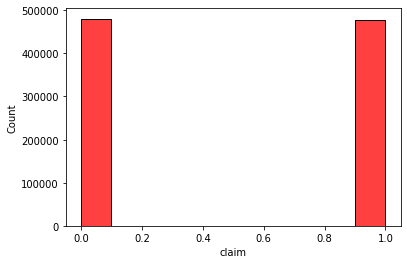

In [12]:
sns.histplot(data=train_df['claim'],palette="viridis",bins=10,color="red")


In [14]:
claim_percentage = pd.DataFrame(train_df["claim"].value_counts() / len(train_df["claim"]))
claim_percentage.T

,0,1
claim,0.501508,0.498492


<AxesSubplot:xlabel='claim', ylabel='count'>

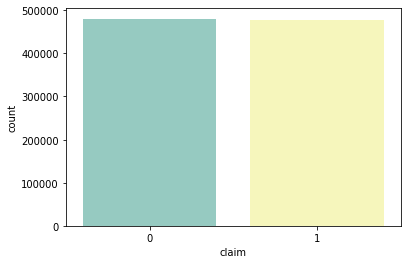

In [19]:
sns.countplot(train_df.claim ,palette="Set3")

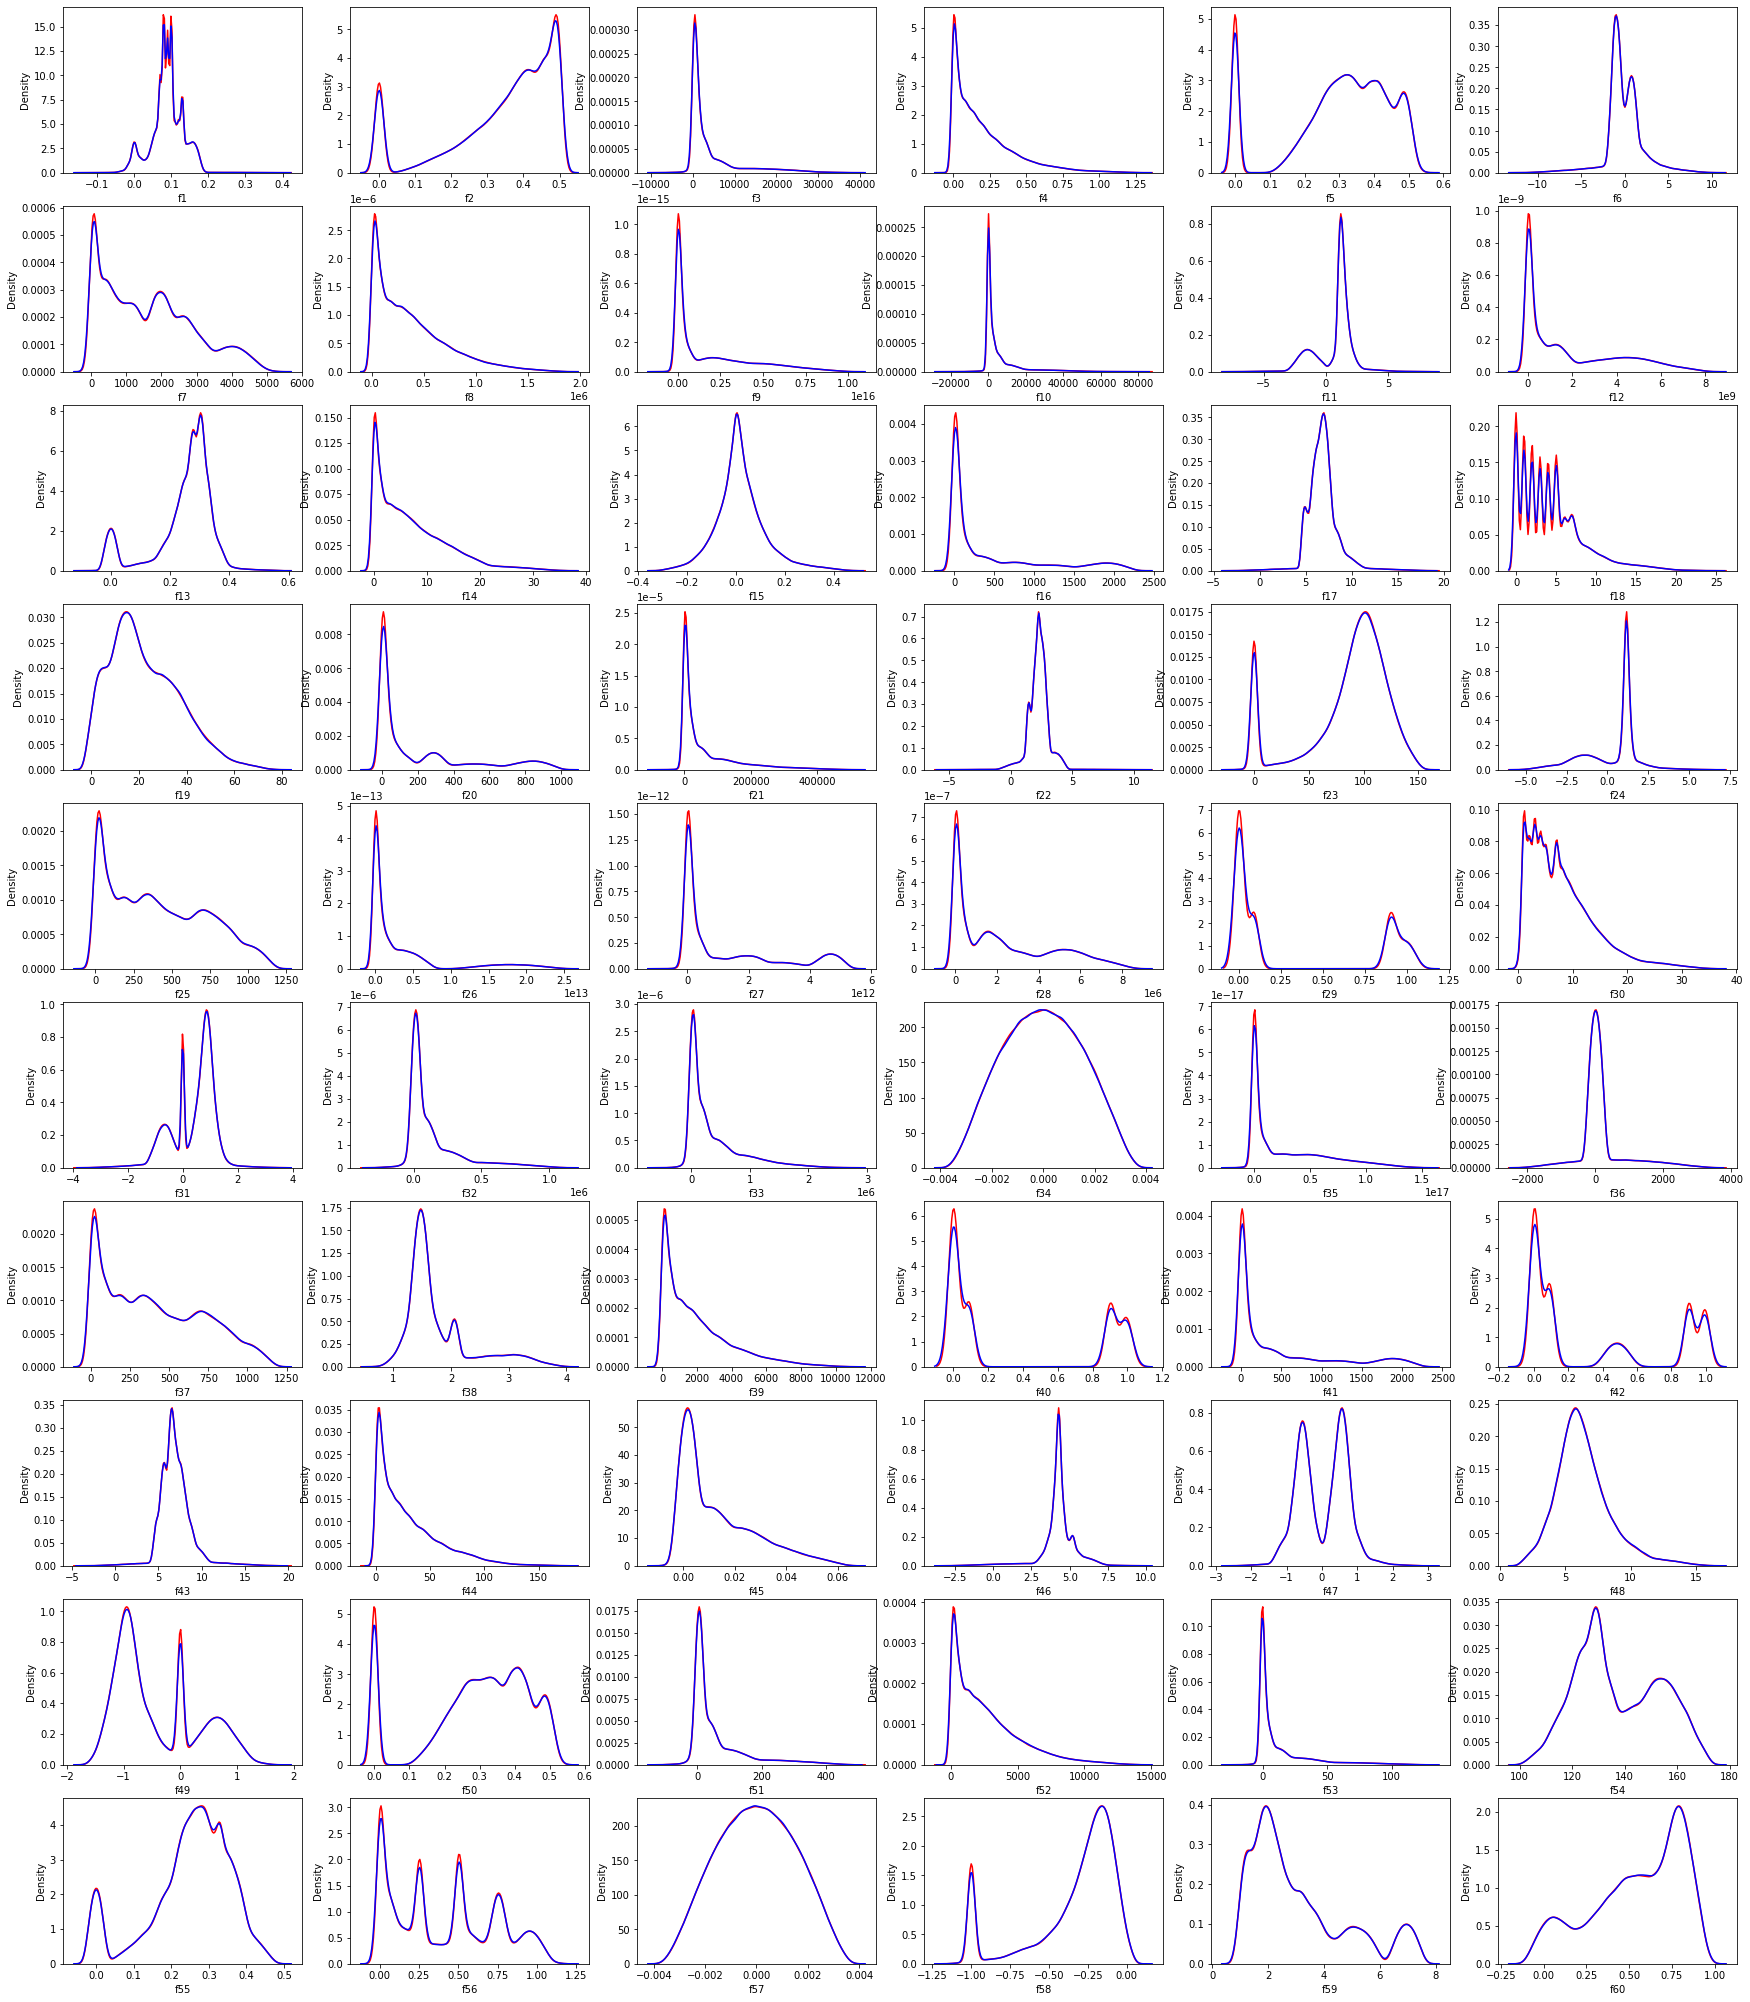

In [17]:
fig, axes = plt.subplots(nrows= 10 , ncols=6 ,figsize =(30,36))
column_number = 1
for i in range(0,10):
    for j in range(0,6):
        subchart = sns.kdeplot(data=train_df , x = str(train_df.columns[column_number]),ax =axes[i,j],color="red",label ="Train")
        subchart = sns.kdeplot(data=test_df, x = str(test_df.columns[column_number]),ax =axes[i,j],color="blue",label ="Train")
        column_number +=1

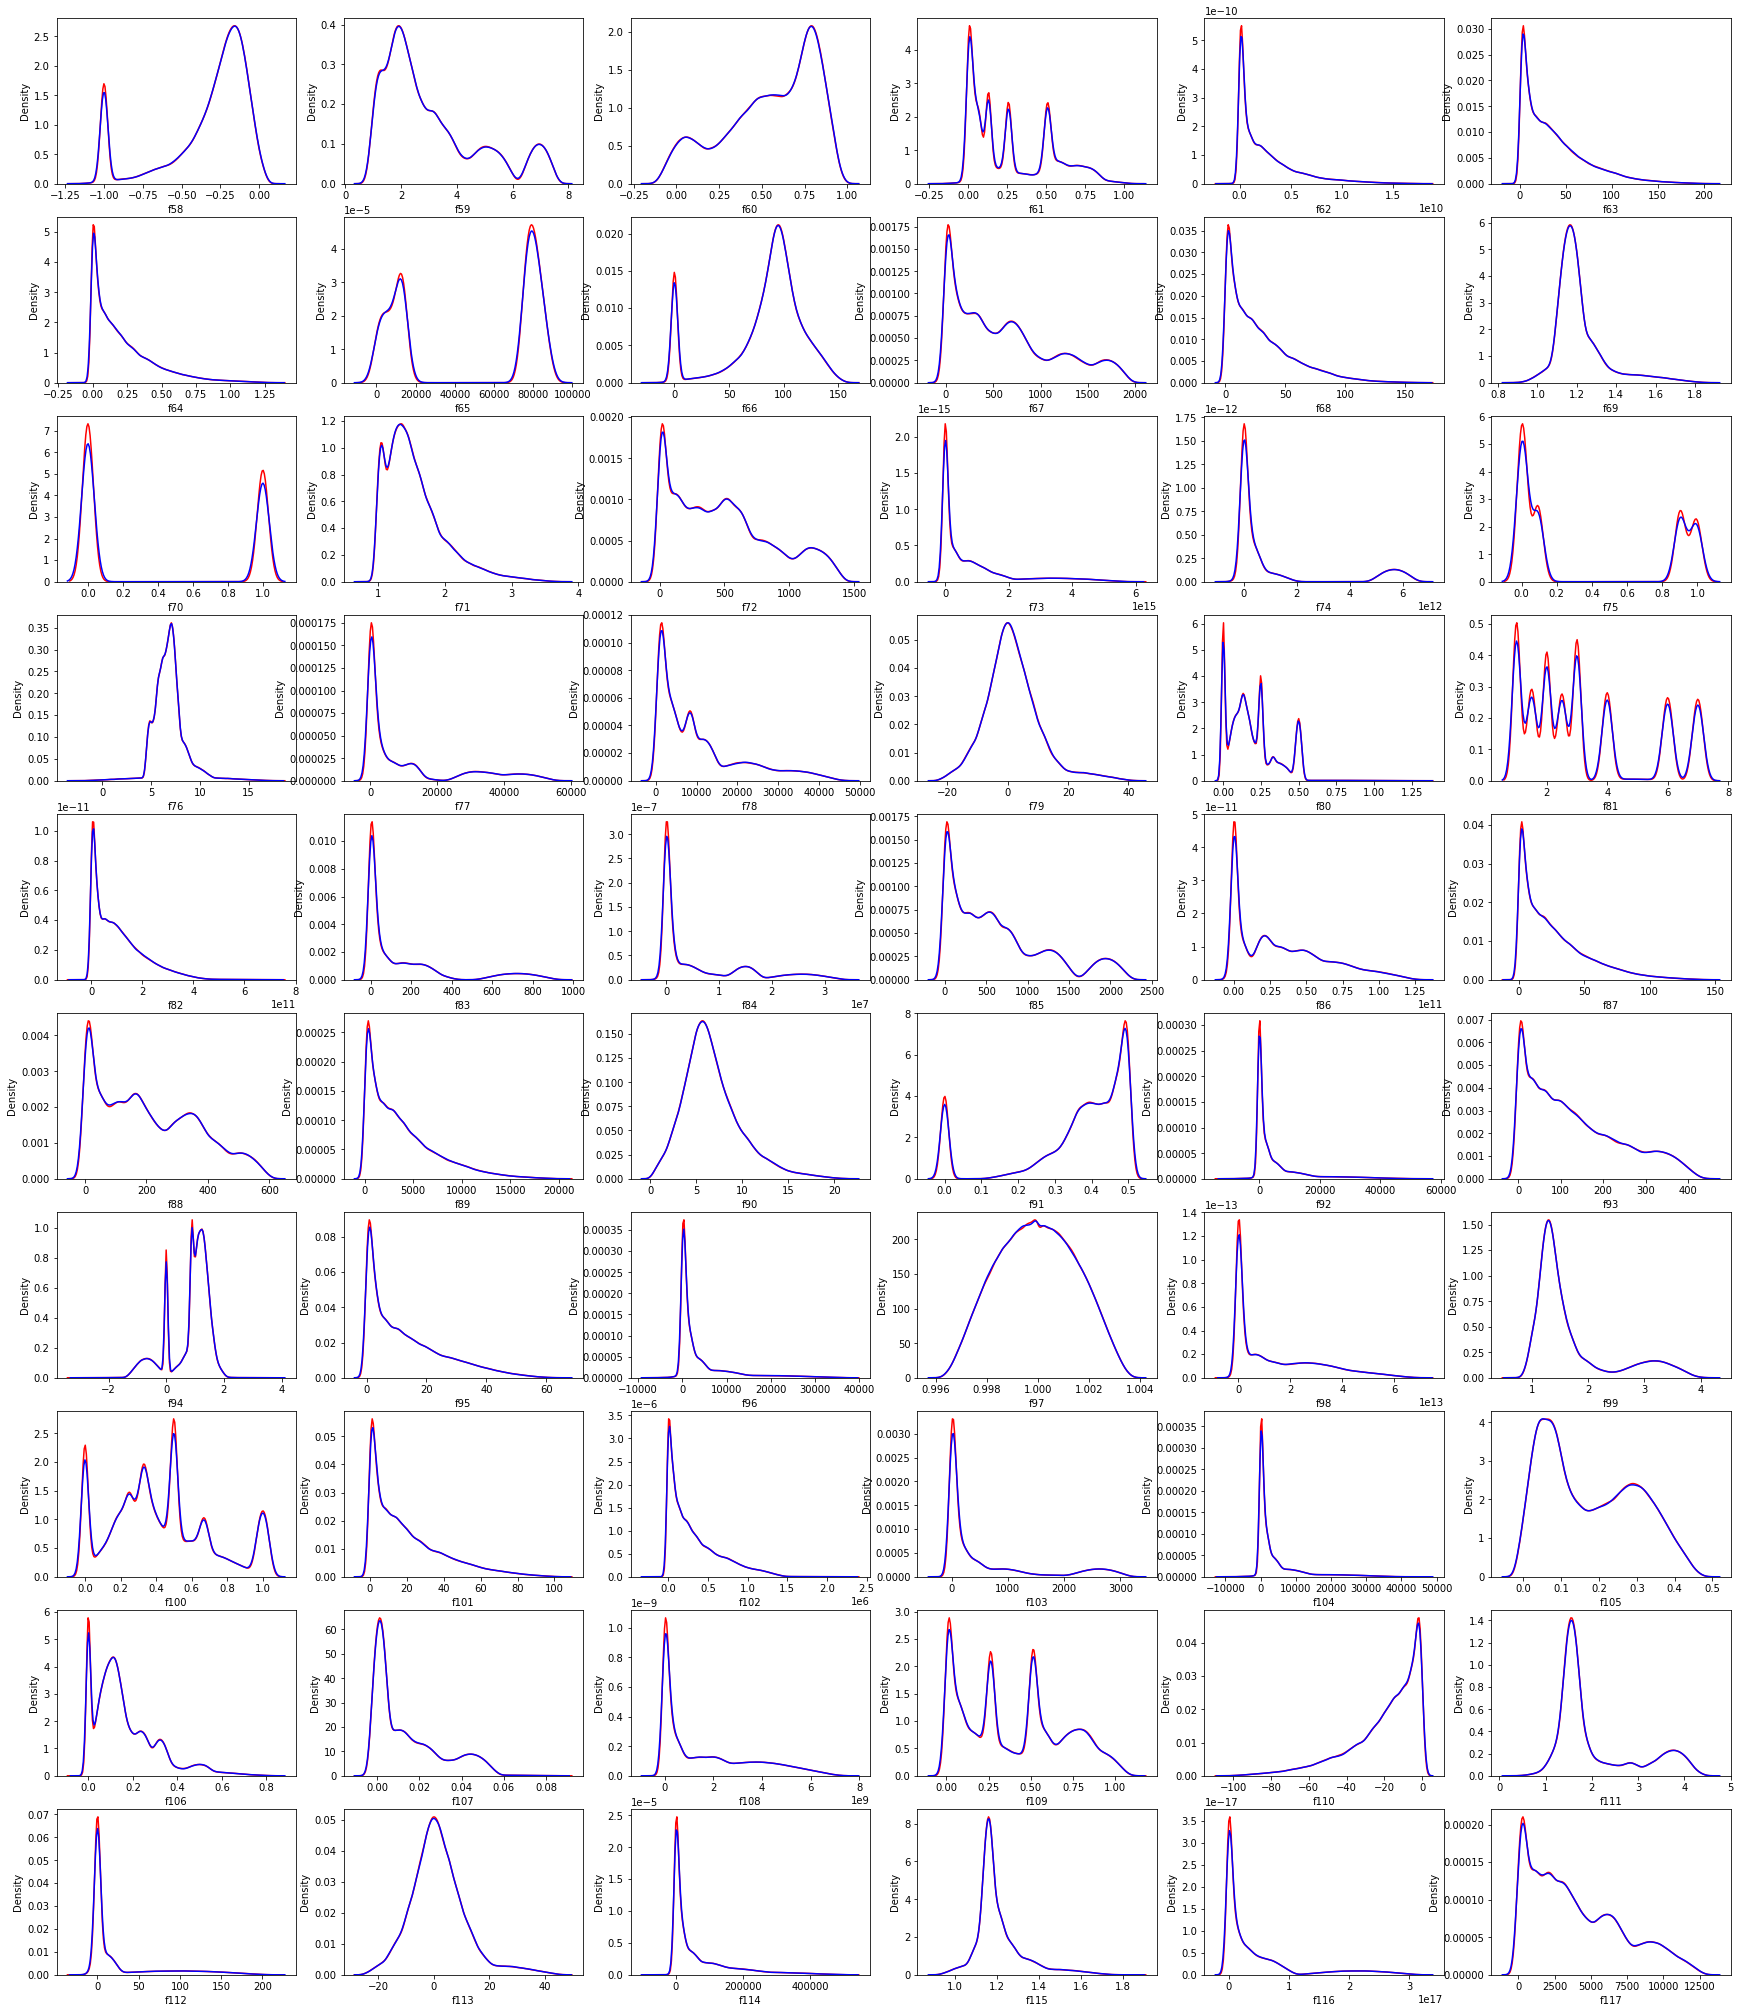

In [18]:
fig, axes = plt.subplots(nrows= 10 , ncols=6 ,figsize =(30,36))
column_number = 58
for i in range(0,10):
    for j in range(0,6):
        subchart = sns.kdeplot(data=train_df , x = str(train_df.columns[column_number]),ax =axes[i,j],color="red",label ="Train")
        subchart = sns.kdeplot(data=test_df , x = str(test_df.columns[column_number]),ax =axes[i,j],color="blue",label ="Test")
        column_number +=1

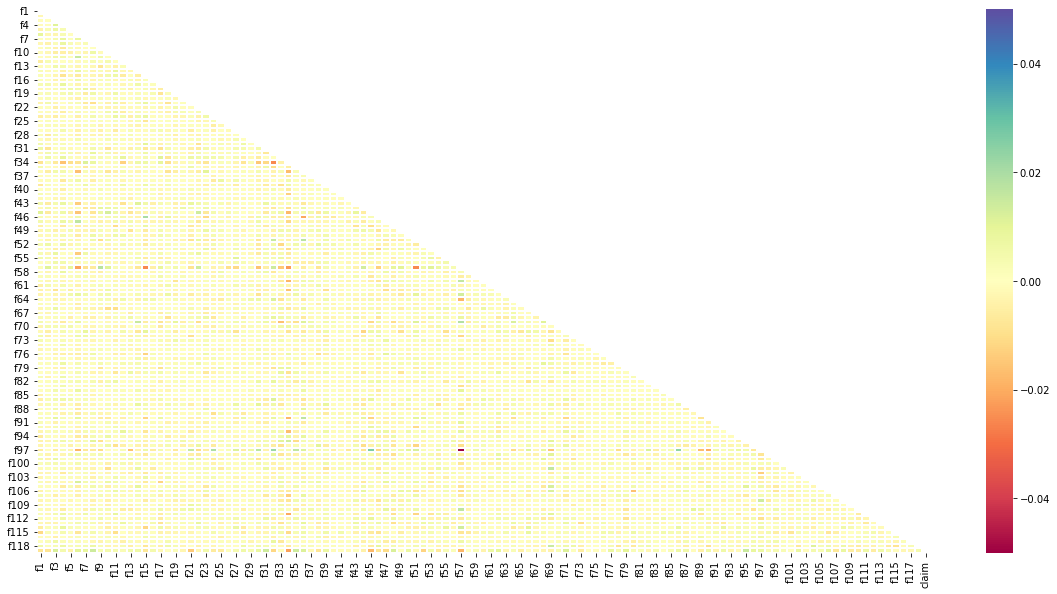

In [20]:
matrix = np.triu(train_df.drop("id" , axis=1).corr())
plt.figure(figsize=(20 ,10))
sns.heatmap(train_df.drop("id", axis=1).corr() , annot= False , cmap="Spectral" , mask=matrix , linecolor="white" ,cbar=True ,vmin= - 0.05  , vmax= 0.05 ,linewidths=0.1)
plt.show()

# Preproccesing

In [21]:
features = train_df.columns.to_list()[1:119]
train_df["n_missing"] = train_df[features].isna().sum(axis=1)
test_df["n_missing"] = test_df[features].isna().sum(axis=1)

train_df['std'] = train_df[features].std(axis=1)
test_df["std"] = test_df[features].std(axis=1)

features += ["n_missing" , "std"]

In [22]:
simple_imputer = SimpleImputer(strategy="mean")
train_df[features] = simple_imputer.fit_transform(train_df[features])
test_df[features] = simple_imputer.transform(test_df[features])

In [23]:
standard_scaler = StandardScaler()
train_df[features] = standard_scaler.fit_transform(train_df[features])
test_df[features] = standard_scaler.transform(test_df[features])

In [24]:
X = train_df.drop(["id","claim"] ,axis=1)
Y = train_df["claim"]
X_test = test_df.drop("id" , axis=1)

# XGBoost Model

In [25]:
def objective(trial , data=X , target= Y):
    params ={"max_depth" :trial.suggest_int("max_depth" ,2,8) , 
          "learning_rate" : trial.suggest_float("learning_rate" , 0.005 , 0.2),
          "n_estimators" : trial.suggest_int("n_estimators" , 1000 ,5000),
          "min_child_weight" : trial.suggest_int("min_child_weight" , 1,500),
          "gamma" : trial.suggest_float("gamma" ,0.0001 , 1.0 , log = True),
          "alpha": trial.suggest_float("alpha" , 0.0001 , 10 ,log = True),
          "lambda": trial.suggest_float("lambda" ,0.0001, 10.0 , log = True),
          "colsample_bytree": trial.suggest_float("colsample_bytree" , 0.1 , 0.8), 
          "subsample": trial.suggest_float("subsample" , 0.1,0.9),
          "tree_method" : "gpu_hist",
          "booster" : "gbtree",
           "random_state": 228 ,
           "use_label_encoder" : False,
           "eval_metric" : "auc"
          }
    model = XGBClassifier(**params)
    scores = []
    K = StratifiedKFold(n_splits=4,random_state=228 , shuffle=True)
    for i ,(train_idx , val_idx) in enumerate(K.split(X,Y)):
        X_train ,X_val = X.iloc[train_idx],X.iloc[val_idx]
        Y_train ,Y_val = Y.iloc[train_idx],Y.iloc[val_idx]
        model.fit(X_train ,Y_train ,eval_set = [(X_val,Y_val)] ,early_stopping_rounds =300 ,verbose = False)
        
        train_prediction = model.predict_proba(X_train)[:,1]
        train_score = roc_auc_score(Y_train ,train_prediction)
        
        validate_prediction = model.predict_proba(X_val)[:,1]
        validate_score = roc_auc_score(Y_val , validate_prediction)
        scores.append((train_score , validate_score))
        
        print(f"Fold {i+1} | AUC : {validate_score} ")
        
    scores = pd.DataFrame(scores ,columns=["train Score" , "Validation Score"])
    return scores["Validation Score"].mean() 

In [26]:
study = optuna.create_study(direction="maximize")
study.optimize(objective ,n_trials= 10)
print("Numbers of finished trials : " , len(study.trials))
print("Best Trials : ", study.best_trial.params)
print("Best Values : " , study.best_value)

[I 2021-09-24 12:04:32,905] A new study created in memory with name: no-name-8860e2d5-089a-4b60-a771-e705e5a0cb6a
[W 2021-09-24 12:04:35,685] Trial 0 failed because of the following error: XGBoostError('[12:04:35] ../src/gbm/gbtree.cc:548: Check failed: common::AllVisibleGPUs() >= 1 (0 vs. 1) : No visible GPU is found for XGBoost.\nStack trace:\n  [bt] (0) /home/hamid/.local/lib/python3.9/site-packages/xgboost/lib/libxgboost.so(+0x9133f) [0x7fc410d3133f]\n  [bt] (1) /home/hamid/.local/lib/python3.9/site-packages/xgboost/lib/libxgboost.so(+0x18602d) [0x7fc410e2602d]\n  [bt] (2) /home/hamid/.local/lib/python3.9/site-packages/xgboost/lib/libxgboost.so(+0x186a6e) [0x7fc410e26a6e]\n  [bt] (3) /home/hamid/.local/lib/python3.9/site-packages/xgboost/lib/libxgboost.so(+0x1b940c) [0x7fc410e5940c]\n  [bt] (4) /home/hamid/.local/lib/python3.9/site-packages/xgboost/lib/libxgboost.so(+0x1b9a5e) [0x7fc410e59a5e]\n  [bt] (5) /home/hamid/.local/lib/python3.9/site-packages/xgboost/lib/libxgboost.so(XGBo

[12:04:35] WARNING: ../src/learner.cc:223: No visible GPU is found, setting `gpu_id` to -1


XGBoostError: [12:04:35] ../src/gbm/gbtree.cc:548: Check failed: common::AllVisibleGPUs() >= 1 (0 vs. 1) : No visible GPU is found for XGBoost.
Stack trace:
  [bt] (0) /home/hamid/.local/lib/python3.9/site-packages/xgboost/lib/libxgboost.so(+0x9133f) [0x7fc410d3133f]
  [bt] (1) /home/hamid/.local/lib/python3.9/site-packages/xgboost/lib/libxgboost.so(+0x18602d) [0x7fc410e2602d]
  [bt] (2) /home/hamid/.local/lib/python3.9/site-packages/xgboost/lib/libxgboost.so(+0x186a6e) [0x7fc410e26a6e]
  [bt] (3) /home/hamid/.local/lib/python3.9/site-packages/xgboost/lib/libxgboost.so(+0x1b940c) [0x7fc410e5940c]
  [bt] (4) /home/hamid/.local/lib/python3.9/site-packages/xgboost/lib/libxgboost.so(+0x1b9a5e) [0x7fc410e59a5e]
  [bt] (5) /home/hamid/.local/lib/python3.9/site-packages/xgboost/lib/libxgboost.so(XGBoosterUpdateOneIter+0x50) [0x7fc410d20ed0]
  [bt] (6) /lib64/libffi.so.6(ffi_call_unix64+0x4c) [0x7fc49ca64c04]
  [bt] (7) /lib64/libffi.so.6(ffi_call+0x1d7) [0x7fc49ca64107]
  [bt] (8) /usr/lib64/python3.9/lib-dynload/_ctypes.cpython-39-x86_64-linux-gnu.so(+0x8e5f) [0x7fc49ca83e5f]



In [14]:
xgb_params = study.best_trial.params
xgb_params

In [15]:
folds = StratifiedKFold(n_splits=5,random_state=228,shuffle=True)
predictions = np.zeros(len(X_test))
for fold,(train_idx,validate_idx) in enumerate(folds.split(X,Y)):
    X_train,X_validate = X.iloc[train_idx] ,X.iloc[validate_idx]
    Y_train,Y_validate = Y.iloc[train_idx] ,Y.iloc[validate_idx]
    xgb_model = XGBClassifier(**xgb_params ,tree_method= "gpu_hist",booster = "gbtree" ,random_state = 228,use_label_encoder = False ,eval_metric = "auc")
    xgb_model.fit(X_train,Y_train,eval_set = [(X_validate,Y_validate)],verbose =False,early_stopping_rounds =300)
    predictions += xgb_model.predict_proba(X_test)[:,1] /folds.n_splits

In [21]:
submit = pd.DataFrame({"id":test_df['id'] , "claim": predictions})
submit.to_csv("/kaggle/working/xgb_submit.csv",index=False)

In [55]:
def objective_cb(trial , data=X ,target=Y):
    params = {"depth":trial.suggest_int("depth" ,2,6),
              "learning_rate":trial.suggest_float("learning_rate" ,0.005 ,0.2),
              "iterations":trial.suggest_int("iterations" ,10000 , 50000),
              "max_bin":trial.suggest_int("max_bin" , 1,300),
              "min_data_in_leaf":trial.suggest_int("min_data_in_leaf" , 1,300),
              "l2_leaf_reg":trial.suggest_float("l2_leaf_reg" , 0.0001 , 1.0 ,log =True),
              "subsample":trial.suggest_float("subsample" , 0.1 , 0.8 ),
              "grow_policy":trial.suggest_categorical("grow_policy" ,['SymmetricTree', 'Depthwise', 'Lossguide']),
              "leaf_estimation_method":trial.suggest_categorical("leaf_estimation_method" , ["Newton" , "Gradient"]),
              "bootstrap_type" :"Bernoulli",
              "random_seed" : 228 , 
              "loss_function":"Logloss",
              "eval_metric":"AUC",
              "task_type" : "GPU"
             }
    model  = CatBoostClassifier(**params)
    scores = []
    K = StratifiedKFold(n_splits=2,random_state=228 , shuffle=True)
    for i ,(train_idx , val_idx) in enumerate(K.split(X,Y)):
        X_train ,X_val = X.iloc[train_idx],X.iloc[val_idx]
        Y_train ,Y_val = Y.iloc[train_idx],Y.iloc[val_idx]
        model.fit(X_train ,Y_train ,eval_set = [(X_val,Y_val)] ,early_stopping_rounds =300 ,verbose = False)
        
        train_prediction = model.predict_proba(X_train)[:,1]
        train_score = roc_auc_score(Y_train ,train_prediction)
        
        validate_prediction = model.predict_proba(X_val)[:,1]
        validate_score = roc_auc_score(Y_val , validate_prediction)
        scores.append((train_score , validate_score))
        
        print(f"Fold {i+1} | AUC : {validate_score} ")
        
    scores = pd.DataFrame(scores ,columns=["train Score" , "Validation Score"])
    return scores["Validation Score"].mean()

In [56]:
study_cb = optuna.create_study(direction ="maximize")
study_cb.optimize(objective_cb,n_trials=10)
print("Numbers of finished trials : " , len(study_cb.trials))
print("Best Trials : ", study_cb.best_trial.params)
print("Best Values : " , study_cb.best_value)

In [57]:
cb_params = study_cb.best_trial.params
cb_params

In [58]:
folds = StratifiedKFold(n_splits=5,random_state=228,shuffle=True)
predictions = np.zeros(len(X_test))
for fold,(train_idx,validate_idx) in enumerate(folds.split(X,Y)):
    X_train,X_validate = X.iloc[train_idx] ,X.iloc[validate_idx]
    Y_train,Y_validate = Y.iloc[train_idx] ,Y.iloc[validate_idx]
    cb_model = CatBoostClassifier(**cb_params ,bootstrap_type="Bernoulli",random_seed= 228 ,loss_function="Logloss",eval_metric="AUC",task_type= "GPU")
    cb_model.fit(X_train,Y_train,eval_set = [(X_validate,Y_validate)],verbose =False,early_stopping_rounds =300)
    predictions += cb_model.predict_proba(X_test)[:,1] /folds.n_splits

In [59]:
submit = pd.DataFrame({"id":test_df['id'] , "claim": predictions})
submit.to_csv("/kaggle/working/catboost_submit.csv",index=False)